[View in Colaboratory](https://colab.research.google.com/github/acchan-ar/MachineLearning/blob/master/MidAssignment.ipynb)

Problem1

最急降下法とニュートン法を実装し、J(w)の値によって比較した。

複数回試したが、どの場合もニュートンの方が早く収束した。
収束するまでのステップ数はテストデータによって異なる。

２つの方法にあまり差がない時もあれば、ニュートン法が最急降下法の半分以下のステップ数で収束することもある。

定数、初期値は以下のようにした。

λ=0.1  
学習率：0.1  
ε（収束判定）：0.001  
w(パラメータ)：(0,0)  



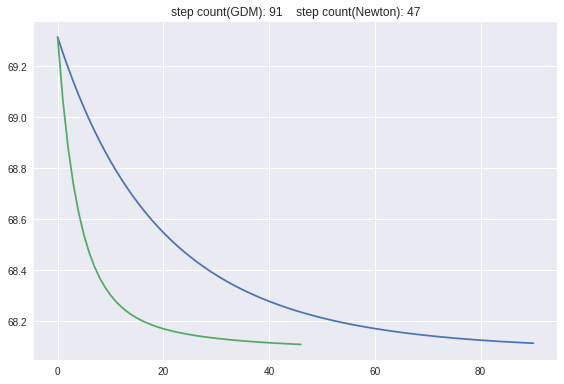

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

# n個のテストデータを作成
def init(n):
    x = 3 * (np.random.rand(n, 2) - 0.5)
    radius = np.power(x[:, 0],2) + np.power(x[:, 1],2)
    y = (radius > 0.7 + 0.1 * np.random.normal(0,1,n)) & (radius < 2.2 + 0.1 * np.random.normal(0,1,n))
    y = 2 * y -1
    return x, y
    
# 最急降下法
def gradient_descent_method(x_train, y_train, w_init):
    w = w_init
    n = y_train.size
    lam = 0.1
    learning_rates = 0.1
    eps = 0.001
    J_history = []
    J = 0
    
    #　最大で100回繰り返す
    for i in range(100):
      
      # 目的関数の値を求める
      J_new = 0
      for y, x in zip(y_train, x_train):
        J_new += np.log(1 + np.exp(-y * np.dot(w.T, x)))
        
      J_new += lam * np.dot(w.T, w)
      J_history.append(J_new)
      
      # 変化がeps以下になったら終了
      if  np.absolute(J_new - J) < eps :
        break
      
      
      J = J_new
      
      
      # 勾配ベクトルを求める
      sum = 0
      for y, x in zip(y_train, x_train):
        sum += -y * x * np.exp(-y*np.dot(w.T,x)) / (1 + np.exp(-y*np.dot(w.T,x)))
      
      J_grad =  sum/n + 2 * lam * w

      # wの更新
      w = w - J_grad * learning_rates


    return J, w, J_history 

# ニュートン法
def newton_method(x_train, y_train, w_init):
    w = w_init
    n = y_train.size
    lam = 0.1
    learning_rates = 0.1
    eps = 0.001
    J_history = []
    J = 0
    
    #　最大で100回繰り返す
    for i in range(100):
      
      # 目的関数の値を求める
      J_new = 0
      for y, x in zip(y_train, x_train):
        J_new += np.log(1 + np.exp(-y * np.dot(w.T, x)))
        
      J_new += lam * np.dot(w.T, w)
      J_history.append(J_new)
      
      # 変化がeps以下になったら終了
      if  np.absolute(J_new - J) < eps :
        break
      
      J = J_new
      
      # 勾配ベクトルを求める
      sum = 0
      for y, x in zip(y_train, x_train):
        sum += -y * x * np.exp(-y*np.dot(w.T,x)) / (1 + np.exp(-y*np.dot(w.T,x)))
      
      J_grad =  sum/n + 2 * lam * w
      
      
      # ヘッセ行列を求める
      sum = 0
      E = np.array([[1, 0], [0, 1]]) # 単位行列
      
      for y, x in zip(y_train, x_train):
        sum += np.exp(-y*np.dot(w.T,x)) / np.power(1 + np.exp(-y*np.dot(w.T,x)), 2) * np.dot(x,  x.T) 
      
      J_hesse =  sum/n + 2 * lam * E
      J_hesse_inv = np.linalg.inv(J_hesse)
      
      # wを更新する
      w = w - np.dot(J_hesse_inv, J_grad) * learning_rates

    return J, w, J_history 

  
# mainの処理
def main():
    n = 100
    x_train, y_train = init(n)
    x_test, y_test = init(10)
    w_init = np.array([.0 , .0])
    
#     print("x:",x_train)
#     print("y", y_train)
#     print("w_init:",w_init)
    
    # 最急降下法で求める
    J_GDM,w_GDM,J_history_GDM = gradient_descent_method(x_train, y_train, w_init)
    
    # ニュートン法で求める
    J_Newton,w_Newton,J_history_Newton = newton_method(x_train, y_train, w_init)
    
    # グラフのタイトル
    plt.title("step count(GDM): " + str(len(J_history_GDM)) + "    step count(Newton): " + str(len(J_history_Newton)))

    # グラフを描く
    x = np.arange(len(J_history_GDM))
    plt.plot(x, J_history_GDM)
    x = np.arange(len(J_history_Newton))
    plt.plot(x, J_history_Newton)
    
    # タイトルが重ならないようにする
    plt.tight_layout()

    # 画像を表示
    plt.show()

main()